***Тема “Обучение без учителя”

**Задание 1**
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

X = pd.DataFrame(data, columns=feature_names)
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [12]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2,
             learning_rate=250,
             random_state=42)

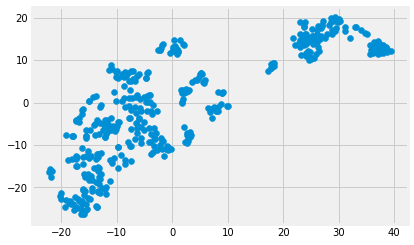

In [13]:
X_train_tsne = model.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

**Задание 2**
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

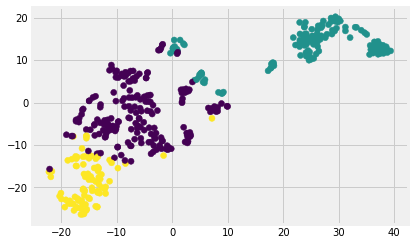

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [45]:
for i in range(0, 3):
    mean_price = y_train[labels_train == i].mean()
    mean_CR = X_train.loc[labels_train == i, 'CRIM'].mean()
    print(f'Cluster {i}:')
    print(f'Mean price - {mean_price}:')
    print(f'Mean crime rate - {mean_CR}:')

Cluster 0:
Mean price - 24.958115183246072:
Mean crime rate - 0.42166020942408367:
Cluster 1:
Mean price - 16.165354330708663:
Mean crime rate - 10.797028425196853:
Cluster 2:
Mean price - 27.78837209302326:
Mean crime rate - 0.07356558139534886:


**Задание 3**
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [47]:
labels_test = kmeans.predict(X_test_scaled)
for i in range(0, 3):
    mean_price = y_test[labels_test == i].mean()
    mean_CR = X_test.loc[labels_test == i, 'CRIM'].mean()
    print(f'Cluster {i}:')
    print(f'Mean price - {mean_price}:')
    print(f'Mean crime rate - {mean_CR}:')

Cluster 0:
Mean price - 21.860784313725492:
Mean crime rate - 0.26607882352941176:
Cluster 1:
Mean price - 16.43714285714286:
Mean crime rate - 10.165531142857143:
Cluster 2:
Mean price - 31.35:
Mean crime rate - 0.062060000000000004:
